In [13]:
#step-1:load the dataset

import pandas as pd
df=pd.read_csv("/content/adult 3.csv")
print(df.info())
print(df.shape)





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None
(48842, 15)


In [14]:
##basic knowlwdge
print(df.head())  #defaulty first 5 records
print(df.tail(7))  # last 7 records
print(df.isna())  #it tells each value in every record of column is valid value or not
print(df.isna().sum()) #it tells how many records in each column are invalid


   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [15]:
##basic knowlegde
print(df.occupation.value_counts()) #in a colums there are many categories to know the count of each category of a column
print(df['marital-status'].value_counts()) #since it have specia character we should access through name of column
print(df.age.value_counts())
print(df.workclass.value_counts())
print(df.fnlwgt.value_counts())
print(df.education.value_counts())
print(df['educational-num'].value_counts())
print(df.relationship.value_counts())
print(df.race.value_counts())
print(df.gender.value_counts())
print(df['capital-gain'].value_counts())
print(df['capital-loss'].value_counts())
print(df['hours-per-week'].value_counts())
print(df['native-country'].value_counts())
print(df.income.value_counts())


occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64
age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc

In [16]:
###step-2: preprocessing
df.occupation.replace({'?':'others'},inplace=True) #convert category of column ? as others
df.workclass.replace({'?':'others'},inplace=True) #inplace is very useful
df['native-country'].replace({'?':'others'},inplace=True)

/tmp/ipython-input-16-2922799819.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.occupation.replace({'?':'others'},inplace=True) #convert category of column ? as others
/tmp/ipython-input-16-2922799819.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

In [17]:
df=df.drop(['education'],axis=1)  #drop the column bcoz as it column is present in another name
df=df[df['workclass']!='Without-pay'] #the category of column which is less contributing can be removed like this
df=df[df['workclass']!='Never-worked']


In [ ]:
df.workclass.value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
others,2799
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432


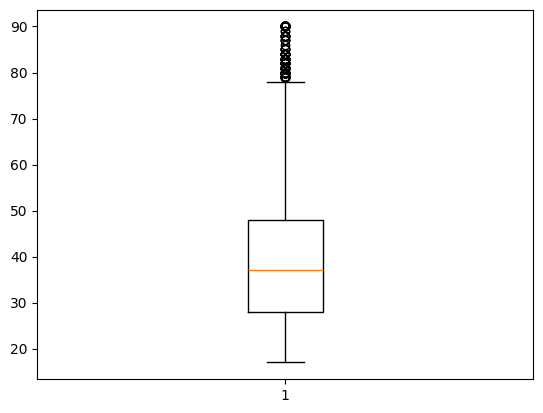

In [18]:
#to visualize the outliers(not imp according to output or less contributing to output)
#orange line is median
import matplotlib.pyplot as plt
plt.boxplot(df['age'])
plt.show()  ## black circles indicates those values have less importance in output

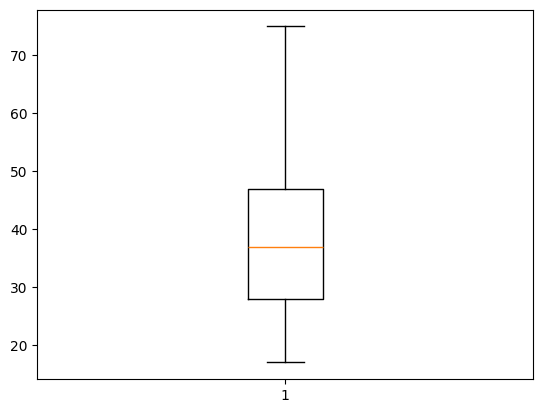

In [19]:
df=df[(df['age']<=75) &(df['age']>=17)]   ###consider the dataset which have this values as age
import matplotlib.pyplot as plt
plt.boxplot(df['age'])
plt.show()

In [20]:
#Encoder:convert categorical data into numerical data

##types of encoding techniques
'''1.Label Encoding:numbers are assigned based on  alphateic order(Blue>green>red so 0,1,2 assigned respectively)
2.2.one-hot encoding:only 0 and 1 (create new columns)
3.ordinal encoding:when there is clear idea ex:10,12,bachelors,masters
4.frequency  encoding:based on number of times it occur in dataset that frequency number is given to each category 100 means 100 times'''


from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['workclass']=encoder.fit_transform(df['workclass'])
df['native-country']=encoder.fit_transform(df['native-country'])
df['marital-status']=encoder.fit_transform(df['marital-status'])
df['occupation']=encoder.fit_transform(df['occupation'])
df['gender']=encoder.fit_transform(df['gender'])
df['race']=encoder.fit_transform(df['race'])
df['relationship']=encoder.fit_transform(df['relationship'])
df['native-country']=encoder.fit_transform(df['native-country'])
df['income']=encoder.fit_transform(df['income'])



In [21]:
#removing unnecessary features
df=df.drop(['fnlwgt','relationship','race','capital-gain','capital-loss','hours-per-week'],axis=1)

In [22]:
##step-3:separate dataset into features and labels
features,label=df.iloc[:,:-1],df.iloc[:,-1]
print(features.shape,label.shape)

#scaling:to convert data into specific range of 0 to 1
#normalization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(features)


'''| Technique           | What it does                                 | Output Range | Function used      |
| ------------------- | -------------------------------------------- | ------------ | ------------------ |
| **Normalization**   | Scales data to a **range between 0 and 1**   | `[0, 1]`     | `MinMaxScaler()`   |
| **Standardization** | Scales data to have **mean = 0 and std = 1** | `(-∞, ∞)`    | `StandardScaler()` |'''




(48438, 7) (48438,)


'| Technique           | What it does                                 | Output Range | Function used      |\n| ------------------- | -------------------------------------------- | ------------ | ------------------ |\n| **Normalization**   | Scales data to a **range between 0 and 1**   | `[0, 1]`     | `MinMaxScaler()`   |\n| **Standardization** | Scales data to have **mean = 0 and std = 1** | `(-∞, ∞)`    | `StandardScaler()` |'

In [23]:
#split data into train ,test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,label,test_size=0.2,random_state=42,stratify=label)
#random_state:it ensures that same data is send in each epoch
#stratify=label ;Ensures equal proportion of classes(label or target) in both train and test sets (used in classification problems) among 20 (10 should be classA and 10 should be from classB).
#epochs:number of times model learns the pattern in data

In [24]:
#step-4:model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])

# Step 2: Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use categorical_crossentropy for multi-class
              metrics=['accuracy'])

# Step 3: Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
model.save("salary_classifier.h5")

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


969/969 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7656 - loss: 0.4764 - val_accuracy: 0.8284 - val_loss: 0.3701
Epoch 2/20
969/969 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8213 - loss: 0.3751 - val_accuracy: 0.8279 - val_loss: 0.3692
Epoch 3/20
969/969 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8201 - loss: 0.3761 - val_accuracy: 0.8301 - val_loss: 0.3663
Epoch 4/20
969/969 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8266 - loss: 0.3667 - val_accuracy: 0.8315 - val_loss: 0.3685
Epoch 5/20
969/969 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8265 - loss: 0.3698 - val_accuracy: 0.8326 - val_loss: 0.3664
Epoch 6/20
969/969 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8302 - loss: 0.3615 - val_accuracy: 0.8295 - val_loss: 0.3665
Epoch 7/20
969/969 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8285 - loss: 0.3681 - val_accuracy: 0.8310 - val_loss: 0.3634
Epoch 8/20
969/969 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8231 - loss: 0.3710 - val_accuracy: 0.8302 - val_

In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 48438 entries, 0 to 48841
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48438 non-null  int64
 1   workclass        48438 non-null  int64
 2   educational-num  48438 non-null  int64
 3   marital-status   48438 non-null  int64
 4   occupation       48438 non-null  int64
 5   gender           48438 non-null  int64
 6   native-country   48438 non-null  int64
 7   income           48438 non-null  int64
dtypes: int64(8)
memory usage: 3.3 MB
None


303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8282 - loss: 0.3591
Test Accuracy: 0.8228736519813538


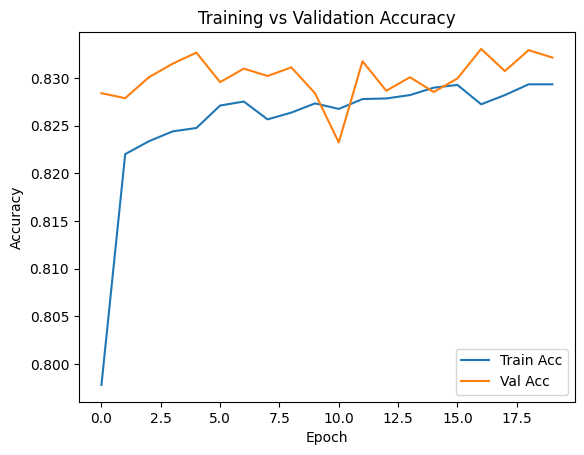

In [26]:
#step-5 evaluate
# Evaluate
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

# Plot Training History
plt.plot(history.history['accuracy'], label='Train Acc')
#validation::predict in dataset   #test :outside the dataset
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
y_pred=model.predict(x_test)
#Use sigmoid activation with Dense(1)
#for binary classification, which outputs probabilities. Convert them to class labels using (model.predict(X_test) > 0.5).astype(int) for evaluation.
y_pred = (y_pred > 0.5).astype(int) #if it is reater than 0.5 probability it is related to class 1(>=) or else class 0(<50)
# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))
print("F1 Score:", round(f1, 2))



303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Precision: 0.67
Recall: 0.51
F1 Score: 0.58


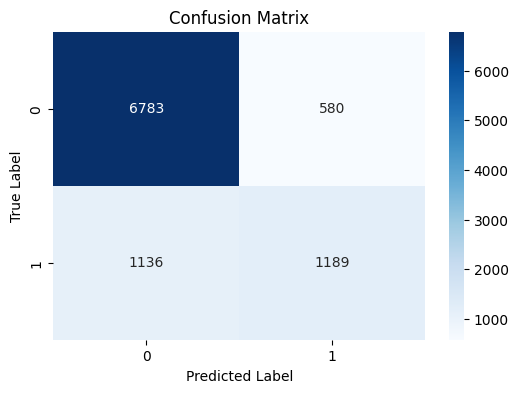

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
'''annot=True: Shows the actual numbers in each square of the heatmap.
fmt='d': Formats the numbers as integers.
cmap='Blues': Color scheme for the heatmap.'''
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [29]:
pip install streamlit

In [4]:
!wget -q -O - ipv4.icanhazip.com

34.105.12.21


In [ ]:
# !streamlit run app.py
!streamlit run app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.105.12.21:8501

⠦⠧⠇⠏⠋your url is: https://lemon-worms-march.loca.lt
2025-07-21 14:10:36.550519: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753107036.585668   20251 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753107036.595112   20251 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-21 14:10:36.628017: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the foll